In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Chennai.csv')

In [3]:
data.head()

,Name,Price,Cuisine_Category,City,Region,Cuisine_Type,Timing,Rating_Types,Rating,Votes
0,Dhaba Estd 1986 Delhi,1500,"North Indian,Desserts,Beverages",Chennai,Ispahani Centre-- Nungambakkam,Casual Dining,"12noon to 4pm,6pm to 1130pm(Mon-Thu),12noon to...",Excellent,4.6,1284
1,Copper Kitchen,800,"Seafood,North Indian,Chinese,Mughlai,Biryani",Chennai,Porur,Casual Dining,11am to 2am(Mon-Sun),Excellent,4.6,3927
2,Palmshore,1000,"Seafood,Biryani,Kebab,North Indian,Chinese,Ara...",Chennai,Ashok Nagar,Casual Dining,1130am to 1am(Mon-Sun),Excellent,4.5,3203
3,Guntur Gongura,400,"North Indian,Chinese,Biryani",Chennai,Sholinganallur,Casual Dining,6am to 2am(Mon-Sun),Good,3.7,2086
4,Hoppipola,1400,"Continental,Mediterranean,American",Chennai,The Spring Hotel-- Nungambakkam,Bar,"3pm to 1130pm(Mon),12noon to 1130pm(Tue-Sun)",Very Good,4.2,959


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3541 entries, 0 to 3540
Data columns (total 10 columns):
Name                3541 non-null object
Price               3541 non-null int64
Cuisine_Category    3541 non-null object
City                3541 non-null object
Region              3541 non-null object
Cuisine_Type        3541 non-null object
Timing              3541 non-null object
Rating_Types        3541 non-null object
Rating              3541 non-null float64
Votes               3541 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 276.7+ KB


#This means that we can make stats using Price, Votes, and Rating as only these ore of datatypes int and float 

In [5]:
data.columns

Index(['Name', 'Price', 'Cuisine_Category', 'City', 'Region', 'Cuisine_Type',
       'Timing', 'Rating_Types', 'Rating', 'Votes'],
      dtype='object')

In [6]:
data.describe()

,Price,Rating,Votes
count,3541.000000,3541.000000,3541.000000
mean,423.394521,3.484298,149.405253
std,286.752614,0.409667,324.595861
min,50.000000,2.100000,4.000000
25%,250.000000,3.200000,15.000000
50%,350.000000,3.500000,41.000000
75%,500.000000,3.700000,139.000000
max,3000.000000,4.900000,4643.000000


In [7]:
data.isna().sum()

Name                0
Price               0
Cuisine_Category    0
City                0
Region              0
Cuisine_Type        0
Timing              0
Rating_Types        0
Rating              0
Votes               0
dtype: int64

In [8]:
data.Name.value_counts().head()

Sri Krishna Bhavan            5
Five Star Chicken             5
Chennai Rawther Restaurant    4
Hotel Pandian                 4
The Red Box                   3
Name: Name, dtype: int64

# How many restaurants are located in which Region

In [9]:
data['Region'].value_counts()[:10]

Anna Nagar East    133
T. Nagar           107
Velachery          105
Nungambakkam       105
Porur               92
Anna Nagar West     87
Kilpauk             83
Adyar               77
Perungudi           75
Medavakkam          72
Name: Region, dtype: int64

Text(0.5,1,'Region')

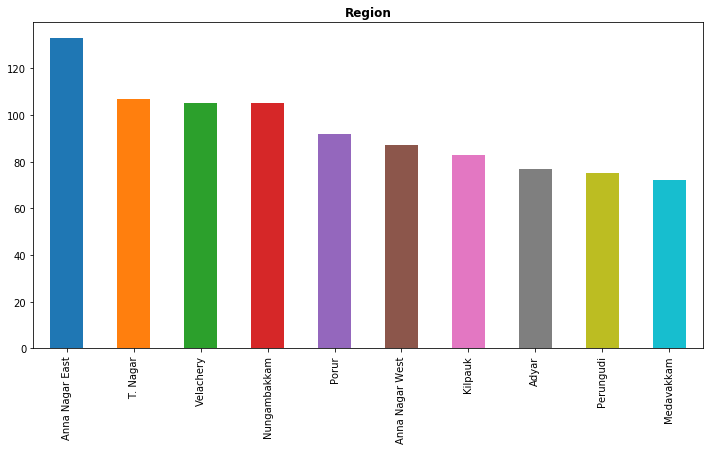

In [10]:
plt.figure(figsize=(12,6)) 
data['Region'].value_counts()[:10].plot(kind = 'bar')
plt.title('Region', weight = 'bold')

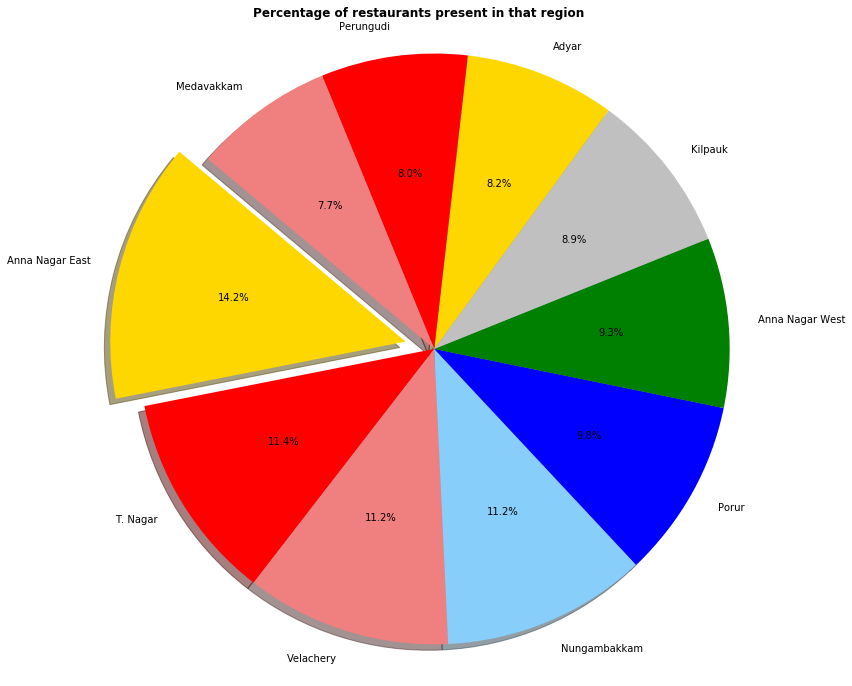

In [11]:
plt.figure(figsize = (12,12))
names = data['Region'].value_counts()[:10].index
values = data['Region'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that region", weight = 'bold')


plt.show()

In [12]:
data['Rating_Types'].value_counts().head(10)

Average         1751
Good            1297
Very Good        422
Excellent         49
Poor              11
Çok iyi            4
Průměr             2
Wybitnie           1
Średnio            1
Skvělá volba       1
Name: Rating_Types, dtype: int64

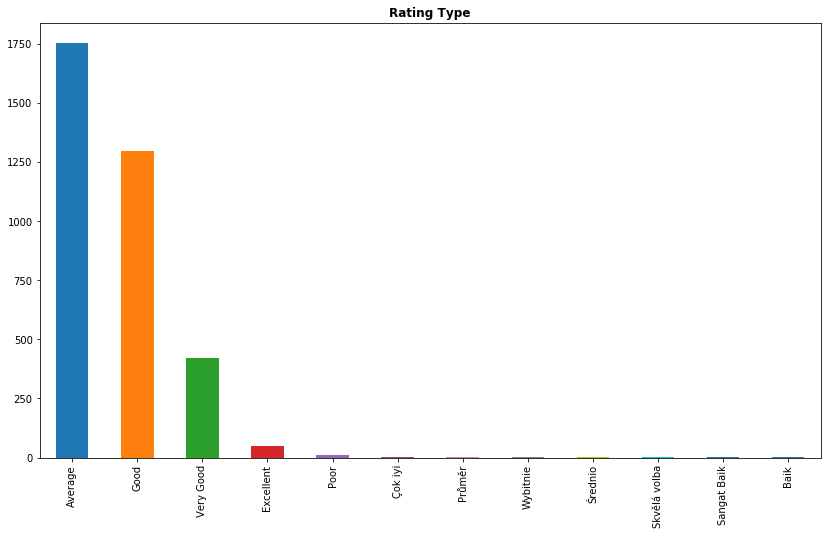

In [13]:
plt.figure(figsize = (14,8))
data.Rating_Types.value_counts()[:15].plot(kind = 'bar')
plt.title('Rating Type', weight = 'bold')
plt.show()

# Cuisine Types

In [14]:
data['Cuisine_Type'].value_counts().head(10)

Quick Bites       1601
Casual Dining      914
none               290
Bakery             171
Café               129
Dessert Parlor     129
Beverage Shop      101
Mess                55
Kiosk               49
Sweet Shop          33
Name: Cuisine_Type, dtype: int64

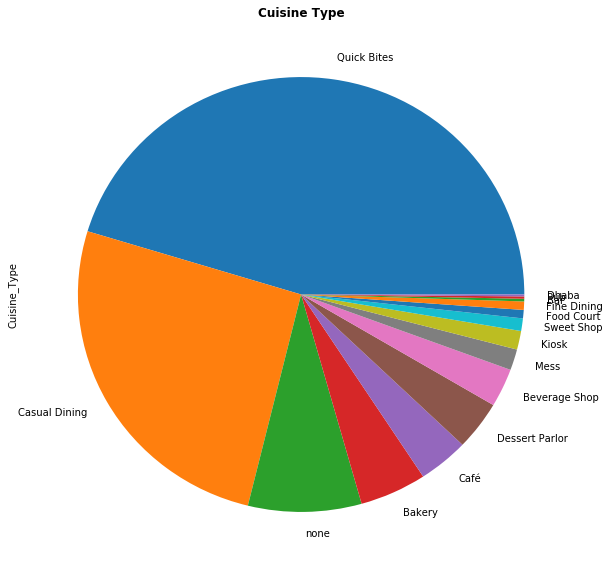

In [15]:
plt.figure(figsize = (10,10))
data.Cuisine_Type.value_counts()[:15].plot(kind = 'pie')
plt.title('Cuisine Type', weight = 'bold')
plt.show()

In [17]:
#We have the most frequently visited Restaurant type - Quickbites

# Ratings

In [16]:
data['Rating'] = data['Rating'].replace('NEW',np.NaN)
data['Rating'] = data['Rating'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [17]:
data['Rating'] = data.loc[:,'Rating'].replace('[ ]','',regex = True)
data['Rating'] = data['Rating'].astype(str)
data['Rating'] = data['Rating'].apply(lambda r: r.replace('/5',''))
data['Rating'] = data['Rating'].apply(lambda r: float(r))

3.484298220841581


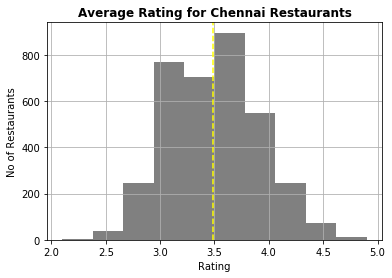

In [18]:
data.Rating.hist(color='grey')
plt.axvline(x= data.Rating.mean(),ls='--',color='yellow')
plt.title('Average Rating for Chennai Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data.Rating.mean())

In [19]:
#Average rating per restaurant in Chennai is found to be around 3.48

# Top cuisines in Chennai 

In [20]:
cuisines_count= []

for i in data.Cuisine_Category:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0,0.5,'No of restaurants')

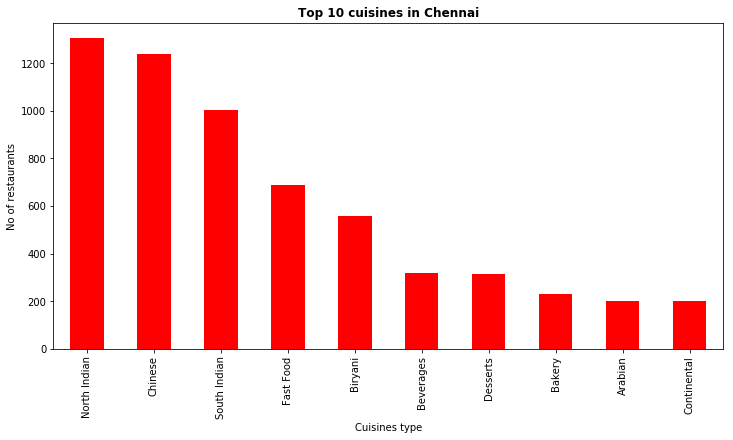

In [21]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Chennai',weight='bold')
plt.xlabel('Cuisines type')
plt.ylabel('No of restaurants')

# Average Cost

In [22]:
data['Price'].value_counts()[:20]

300     657
400     461
200     435
500     338
250     331
350     238
600     183
150     179
450     139
700      96
800      95
1000     56
550      51
100      50
650      39
1500     28
900      26
1200     25
750      22
850      16
Name: Price, dtype: int64

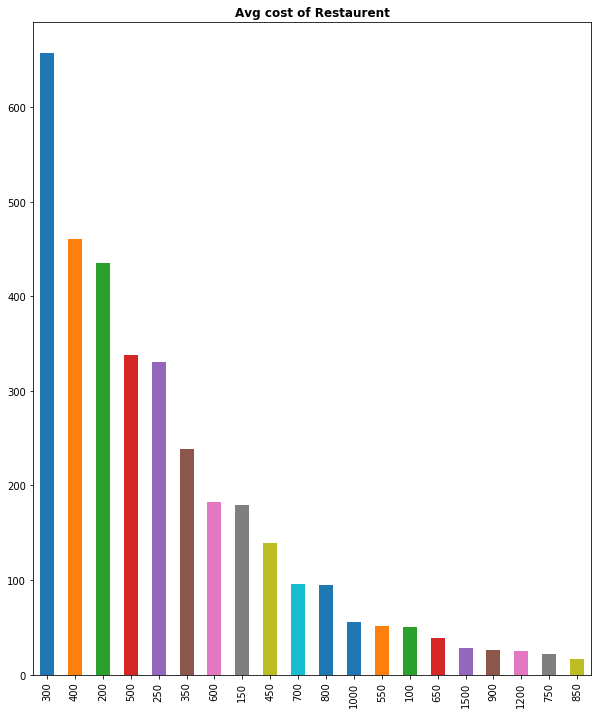

In [23]:
plt.figure(figsize = (10,12))
data['Price'].value_counts()[:20].plot(kind = 'bar')
plt.title('Avg cost of Restaurent', weight = 'bold')
plt.show()

In [24]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5,1,'Average cost for 2 people in Rupees')

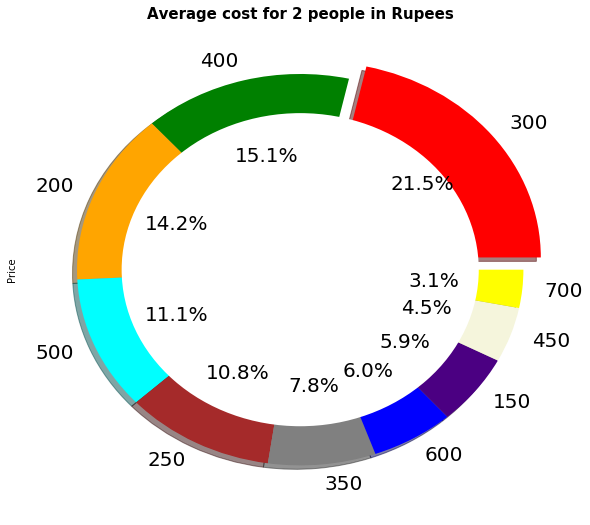

In [25]:
fig= plt.figure(figsize=(10, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

delplot = data['Price'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')

#This implies that the average price of the restaurant is 300